In [2]:
import os, sys, glob
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib.ticker import FormatStrFormatter
import matplotlib.colors as mcolors
assert 'Times New Roman' in list(sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist]))
# print(matplotlib.matplotlib_fname())

plt.rcParams['font.family'] = 'Times'  # sometimes 'Times New Roman'
plt.rcParams['font.serif'] = ['Times'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True
plt.rcParams['font.weight'] = 'normal'

GLOBAL_FS = 25
LINE_STYLES = ['-', ':', '--', '-.'] #'solid', 'dotted', 'dashed', 'dashdot'
EXTENDED_LINE_STYLES = ['-', ':', '--', '-.', (5, (15, 2)), (0, (5,2,1,2,1,2)), (0, (5,5)), (0, (5,2,1,2,1,2,1,2)),]
MARKER_STYLES = ['o', 's', '^', 'v', 'd', '<', '>', '*', 'p', 'h', 'D', 'X', 'P']
COLOR_STYLES = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'brown', 'pink', 'olive']

def set_ax_thickness(ax, thickness=2):
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(thickness)
        
def set_ax_grid(ax):
    ax.grid(color='black', linestyle=':', linewidth=0.2)
    
def set_ax_ticks(ax, direction, low_bound, high_bound, interval, n_subs=5, fontsize=GLOBAL_FS):
    ticks = np.arange(low_bound, high_bound+interval/2, interval)
    sub_ticks = np.arange(low_bound, high_bound+interval/2/n_subs, interval/n_subs)
    if direction.lower() == 'x':
        ax.set_xticks(ticks, fontsize=fontsize)
        ax.set_xticks(sub_ticks, minor=True, fontsize=fontsize)
    elif direction.lower() == 'y':
        ax.set_yticks(ticks, fontsize=fontsize)
        ax.set_yticks(sub_ticks, minor=True, fontsize=fontsize)
    set_ax_labelsize(ax, fontsize)
    
def set_ax_labelsize(ax, labelsize=GLOBAL_FS):
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(labelsize)
        
def set_ax_ticks_styles(ax, labelsize=GLOBAL_FS, ticklength=10, tickwidth=2, tickdirection='in', ticksboth=True):
    ticklocs = {"bottom": True, "top": True, "left": True, "right": True}
    ax.tick_params(axis='both', which='major', labelsize=labelsize, 
                   length=ticklength, width=tickwidth, direction=tickdirection,
                   **ticklocs)
    ax.tick_params(axis='both', which='minor', labelsize=labelsize, 
                   length=ticklength/2, width=tickwidth, direction=tickdirection,
                   **ticklocs)

In [4]:
def plot_LL(list_of_mean_dict, list_of_std_dict=None, list_of_legend=None,
            fontsize=25, figsize=(8, 6), marksize=10,
            ymin=None, ymax=None, y_label="", x_label="",
            show_num=False, legend_loc='best', save_fn=None, 
            text_label=None, text_loc=None, show_hline=True, legend_skip=0, n_cols=1, legend_fs=25,
            tick_lo=1.0, tick_hi=5, tick_interval=1, tick_n_subs=10,
            with_decimal=True):
    if type(list_of_mean_dict) != list:
        list_of_mean_dict = [list_of_mean_dict]
    n = len(list_of_mean_dict)
    if list_of_std_dict != None:
        assert n == len(list_of_std_dict)
    if list_of_legend != None:
        assert n == len(list_of_legend)
    xs = list(range(len(list_of_mean_dict[0])))
    xs_labels = sorted(list_of_mean_dict[0].keys())  # Good for now, layer < 10
    
    # FIGURE PARAMS
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    capsize = 12; ms = marksize; lw = 4; fs = fontsize
    colors = COLOR_STYLES[legend_skip:]
    fmts   = MARKER_STYLES[legend_skip:]
    lss = EXTENDED_LINE_STYLES[legend_skip:]
    
    # PLOT DATA
    for i in range(n):
        ys = [list_of_mean_dict[i][x] for x in list_of_mean_dict[i]]
        label = list_of_legend[i] if list_of_legend != None else None
        c = colors[i % (len(colors))]
        fmt = fmts[i % (len(fmts))]
        ls = lss[i % (len(lss))]
        if i != 0:
            marker_style = {"mfc": 'none', "mec": c, "mew": 3} # marker font color, edge color, edge width
        else:
            marker_style = {}
        ax.plot(xs, ys, fmt, color=c, ms=ms, lw=lw, ls=ls, label=label, **marker_style)
        if list_of_std_dict != None:
            dys = [list_of_std_dict[i][x] for x in list_of_std_dict[i]]
            ax.errorbar(xs, ys,  yerr=dys, 
                        fmt=fmt, color=c, capsize=capsize, elinewidth=2, capthick=2, lw=0, ls=ls, ms=ms, **marker_style)
        
    # TICKS
    ax.set_xticks(ticks=xs, labels=xs_labels, fontsize=fs)
    # ax.set_yticks(ticks=np.linspace(1, ymax, 10), fontsize=fs)
    if with_decimal: ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    # set_ticks(ax, 'x',  -1, len(xs), 10)
    set_ax_ticks(ax, 'y', tick_lo, tick_hi, tick_interval, n_subs=tick_n_subs)
    set_ax_ticks_styles(ax, labelsize=fs)

    # LABELS
    ax.set_ylabel(y_label, fontsize=fs)
    ax.set_xlabel(x_label, fontsize=fs)
    ax.set_xlim(-1, len(xs))
    if ymin != None and ymax != None: ax.set_ylim(ymin, ymax)
    
    # BORDERS
    set_ax_thickness(ax)   
    # GRIDLINES
    set_ax_grid(ax)
    
    if show_hline == True:
        ax.axhline(y=1.0, xmin=-1, xmax=len(xs)+1, color='gray', linestyle='--', lw=lw, zorder=-50)
        
    if text_label and text_loc:
        ax.text(*text_loc, text_label, fontsize=fs)
    
    if list_of_legend != None:
        handles, labels = plt.gca().get_legend_handles_labels()
        order = list(range(len(labels))) 
        plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc=legend_loc, fontsize=legend_fs, frameon=True, handlelength=2, markerscale=1, ncol=n_cols)
           
    if save_fn != None:
        plt.savefig(save_fn, bbox_inches='tight', dpi=400)
        print(f'saved to {save_fn}')
        
    plt.show()

## Free

mean = [1.699, 1.618, 1.572, 1.548, 1.523, 1.491, 1.491, 1.465, 1.454, 1.454, 1.444]   
std  = [0.296, 0.265, 0.27, 0.274, 0.253, 0.255, 0.255, 0.22, 0.23, 0.23, 0.229]

## 0.005 %
mean = [1.742, 1.615, 1.615, 1.615, 1.615, 1.613, 1.609, 1.609, 1.609, 1.609, 1.609]   
std  = [0.286, 0.272, 0.272, 0.272, 0.272, 0.273, 0.275, 0.275, 0.275, 0.275, 0.275]

## 0.01 %

mean = [1.78, 1.768, 1.768, 1.768, 1.756, 1.746, 1.746, 1.744, 1.744, 1.744, 1.744]   
std  = [0.252, 0.258, 0.258, 0.258, 0.266, 0.27, 0.27, 0.272, 0.272, 0.272, 0.272]

## 0.05 %

mean = [2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9]   
std  = [0.558, 0.558, 0.558, 0.558, 0.558, 0.558, 0.558, 0.558, 0.558, 0.558, 0.558]

## 0.1 %

mean = [3.441, 3.441, 3.441, 3.441, 3.441, 3.441, 3.441, 3.441, 3.441, 3.441, 3.441]   
std  = [0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.665]

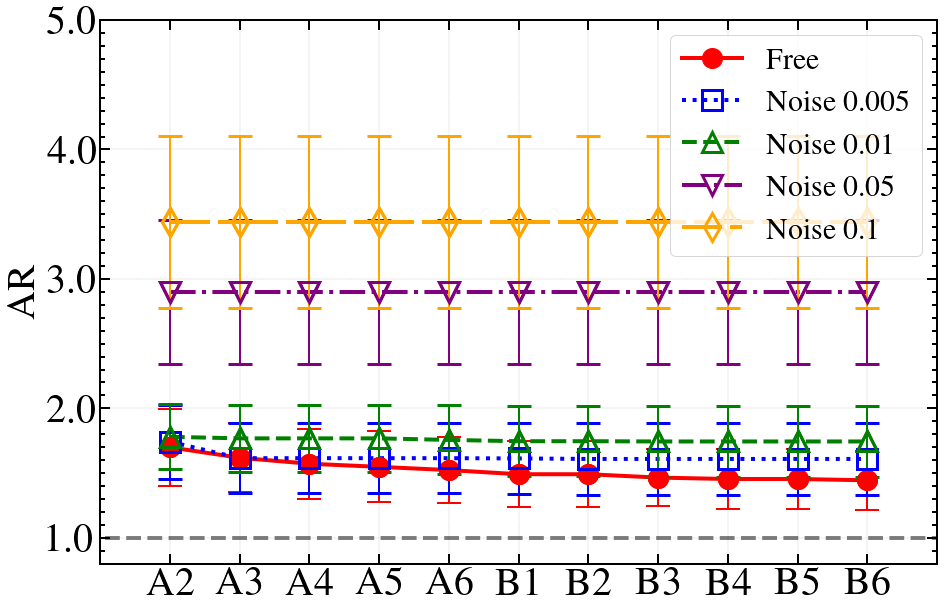

In [10]:
protocol_list = ['A2', 'A3', 'A4', 'A5', 'A6', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6']

list_mean_dict = []
list_legends = []
list_std_dict = []

from collections import defaultdict

mean = [1.699, 1.618, 1.572, 1.548, 1.523, 1.491, 1.491, 1.465, 1.454, 1.454, 1.444]
std = [0.296, 0.265, 0.27, 0.274, 0.253, 0.255, 0.255, 0.22, 0.23, 0.23, 0.229]
list_mean_dict.append({k: x for k, x in zip(protocol_list, mean)})
list_std_dict.append({k: x for k, x in zip(protocol_list, std)})
list_legends.append(f'Free')

mean = [1.742, 1.615, 1.615, 1.615, 1.615, 1.613, 1.609, 1.609, 1.609, 1.609, 1.609]
std = [0.286, 0.272, 0.272, 0.272, 0.272, 0.273, 0.275, 0.275, 0.275, 0.275, 0.275]
list_mean_dict.append({k: x for k, x in zip(protocol_list, mean)})
list_std_dict.append({k: x for k, x in zip(protocol_list, std)})
list_legends.append(f'Noise 0.005%')

mean = [1.78, 1.768, 1.768, 1.768, 1.756, 1.746, 1.746, 1.744, 1.744, 1.744, 1.744]
std = [0.252, 0.258, 0.258, 0.258, 0.266, 0.27, 0.27, 0.272, 0.272, 0.272, 0.272]
list_mean_dict.append({k: x for k, x in zip(protocol_list, mean)})
list_std_dict.append({k: x for k, x in zip(protocol_list, std)})
list_legends.append(f'Noise 0.01%')

mean = [2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9]
std = [0.558, 0.558, 0.558, 0.558, 0.558, 0.558, 0.558, 0.558, 0.558, 0.558, 0.558]
list_mean_dict.append({k: x for k, x in zip(protocol_list, mean)})
list_std_dict.append({k: x for k, x in zip(protocol_list, std)})
list_legends.append(f'Noise 0.05%')

mean = [3.441, 3.441, 3.441, 3.441, 3.441, 3.441, 3.441, 3.441, 3.441, 3.441, 3.441]
std = [0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.665]
list_mean_dict.append({k: x for k, x in zip(protocol_list, mean)})
list_std_dict.append({k: x for k, x in zip(protocol_list, std)})
list_legends.append(f'Noise 0.1%')

plot_LL(list_mean_dict, list_std_dict, list_legends, figsize=(15, 10), marksize=20, y_label=r"AR", fontsize=40, legend_fs=30, 
        ymin=0.8, ymax=5.0, n_cols=1, save_fn=None, legend_loc='upper right',
        tick_lo=0.0, tick_hi=5, tick_interval=1, tick_n_subs=10,)